<img src="image1.jpeg">


# Project:  (InvestigateTMDb Movies Dataset)




## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<p style='text-align: justify;'> The primary goal of the project is to go through the general data analysis process, using basic data analysis technique with NumPy, Pandas, and Matplotlib. It contains four parts:</p>

   1. Questions Asking

   2. Data Wrangling

   3. Exploratory Data Analysis

   4. Drawing Conclusion

<p style='text-align: justify;'> 
For this Data Analyst project, I selected the TMDb movie dataset from kaggle to investigate. According to kaggle introduction page, the data contains information that are provided from The Movie Database (TMDb). It collects 10,000+ movies and their rating and basic move information, including user ratings and revenue data, and the whole dataset duration covers from 1960 to 2015.</p>


<span style="color:red">The potential problem that can be discussed in the dataset: </span>

<p style='text-align: justify;'> 
According Kaggle data overview, the dataset provides some metrics that measure how successful these movies are. These metrics include popularity, revenue and vote average. It also contains some basic information corresponding to the movie like cast, director, keywords, runtime, genres, etc. Any of the basic information can be a key to a success movie. More specifically, these factors can be classified to two categories as follows:
</span>

<span style="color:green">- Metrics for Evaluating the Success Movie </span>

<span style="color:green">- Potential Key to Affect the Success of a Movie </span>

<img src="image2.jpeg">

<p style='text-align: justify;'> 
Since the dataset is featured with the rating of movies as mentioned above, it contains plentiful information for exploring the properties that are associated with successful movies, which can be defined by high popularity, high revenue and high rating score movies. Besides, the dataset also contains the movie released year, so it also can let us to explore the trend in these movie metrics. Therefore, the questions I am going to explore are including five parts: </span>

<span style="color:blue">Research Part 1: Which genres are most popular from year to year? </span>

•	What is the most popular genres through the period (1960-2015)?

•	What is the total number of each type of movies each year

•	What is the best movie released for each year?

•	What is the percentage of movies in each genre between 1960 and 2015?

•	What is the number of movies according to movie genres?

<span style="color:blue">Research Part 2: What kinds of properties are associated with movies that have  high revenues through the period (1960-2015)? </span>

•	Plot the total profits earned by all movie’s vs year of their release

•	Which genres that has higher revenue?

•	Which Director that has higher revenue?

•	What is the average budget of a successful movie? 

•	What is the revenue budget of a successful movie? 

<span style="color:blue">Research Part 3: In which year most of the movies released? </span>

<span style="color:blue">Research Part 4: What is the average runtime of the movies? </span>

<span style="color:blue">Research Part 5: What is the popularity over years?</span>


In [25]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#import the packages that will be used
import numpy as np
import pandas as pd
import csv # read and write csv files
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [26]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#Read TMDb movie csv file
tmdb_movies = pd.read_csv('tmdb-movies.csv')
tmdb_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [27]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [28]:
tmdb_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [29]:
tmdb_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Removing the unused information from the dataset)

###  Based on the analysis above , will do the following process:

1- In this study I will remove unused column such as ( id, imdb_id,homepage, tagline,keywords, overview, budget_adj, revenue_adj)

2- Remove dublicated rows.

3- We have zero budget or zero revenue and runtime in some movies in the database , we will replace it to NAN to have realisic results while doing statistics.

4- I will fill the null value with NAN on production_companies.

5- We have null value in (cast, director, genres,runtime) can be dropped. 

### 1- Remove unused columns 

In this process i will delete the coumns that we not need it in this study such as ( id, imdb_id, budget_adj, revenue_adj,homepage, keywords, overview)

In [30]:
# Reference :https://cmdlinetips.com/2018/04/how-to-drop-one-or-more-columns-in-pandas-dataframe/

#create a list of column that will be deleted
delete_column=['id', 'imdb_id','tagline', 'homepage', 'keywords', 'overview','budget_adj', 'revenue_adj']

#deleting the columns
tmdb_movies= tmdb_movies.drop(delete_column,axis=1)

#previewing the new dataset
tmdb_movies.head(5)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


### 2- Remove dublicated rows.


In [31]:
# Check the number of dublicated rows
tmdb_movies.duplicated().sum()

1

In [32]:
# Reference: https://stackoverflow.com/questions/23667369/drop-all-duplicate-rows-in-python-pandas
# Drop the dublicated rows
tmdb_movies.drop_duplicates(keep= 'first',inplace = True)
rows, column = tmdb_movies.shape

print('There are now {} total entries of movies and {} No.of columns in it.'.format(rows,column))

There are now 10865 total entries of movies and 13 No.of columns in it.


In [33]:
# check the code working 
tmdb_movies.duplicated().sum()

0

### 3. Replacing Zero with NAN in budget , revenue and runtime column.



#### - Check first if our dataset contains budget , revenue and runtime of Zero 

In [34]:
# Checking for an zero values in the budget and revenue columns
print("Rows With Zero Values In The Budget  Column:",tmdb_movies[(tmdb_movies['budget'] ==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",tmdb_movies[(tmdb_movies['revenue']==0)].shape[0])
print("Rows With Zero Values In The Runtime Column:",tmdb_movies[(tmdb_movies['runtime']==0)].shape[0])

# Another Method
#   Zero_revenue = tmdb_movies['revenue'] == 0
#   tmdb_movies[Zero_revenue].shape , tmdb_movies[Zero_revenue].index.values

Rows With Zero Values In The Budget  Column: 5696
Rows With Zero Values In The Revenue Column: 6016
Rows With Zero Values In The Runtime Column: 31


#### - Replacing Zero with NAN for ( budget , revenue and runtime)  column

In [35]:
#Reference:https://stackoverflow.com/questions/45416684/python-pandas-replace-multiple-columns-zero-to-nan?rq=1
#replacing zero value with NaN for 'budget','revenue','runtime' column in the dataset
tmdb_movies['budget' ] =tmdb_movies['budget' ].replace(0, np.NAN)
tmdb_movies['revenue'] =tmdb_movies['revenue'].replace(0, np.NAN)
tmdb_movies['runtime'] =tmdb_movies['runtime'].replace(0, np.NAN)

### 4- Fill the null value with NAN on production_companies.

In [36]:
#Reference:https://www.youtube.com/watch?v=JJaLtI-6BT0
#fill the null values with NAN using 'fillna' function in production_companies
tmdb_movies['production_companies']=tmdb_movies['production_companies'].fillna('NAN')

### 5- Drop null value in (cast, director, genres,runtime)

In [37]:
# reference:https://stackoverflow.com/questions/39436018/how-to-drop-null-values-in-pandas
tmdb_movies.dropna(subset=['cast','director','genres','runtime'], inplace=True)  

In [38]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 13 columns):
popularity              10703 non-null float64
budget                  5150 non-null float64
revenue                 4843 non-null float64
original_title          10703 non-null object
cast                    10703 non-null object
director                10703 non-null object
runtime                 10703 non-null float64
genres                  10703 non-null object
production_companies    10703 non-null object
release_date            10703 non-null object
vote_count              10703 non-null int64
vote_average            10703 non-null float64
release_year            10703 non-null int64
dtypes: float64(5), int64(2), object(6)
memory usage: 919.8+ KB


In [39]:
tmdb_movies.isnull().sum()

popularity                 0
budget                  5553
revenue                 5860
original_title             0
cast                       0
director                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [40]:
# export the cleanded dataset to use it later if needed
export_csv=tmdb_movies.to_csv('export_csv.csv')


### Descriptive Statistics

In this section basic descriptive statistics are being presented for each column from the dataset after cleaning.


In [41]:
# Here's below the statistics ,after Cleaning the data.
tmdb_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10703.000000,5.150000e+03,4.843000e+03,10703.000000,10703.000000,10703.000000,10703.000000
mean,0.653818,3.084401e+07,8.933981e+07,102.736896,220.333178,5.966112,2001.235355
std,1.005687,3.893782e+07,1.621546e+08,30.079331,579.481969,0.930155,12.825920
min,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,0.211533,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000
50%,0.388036,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000
75%,0.722438,4.000000e+07,1.000000e+08,112.000000,149.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Plot the dataset to have general overview about the data

In [42]:
plot_data = tmdb_movies.groupby('release_year').mean()

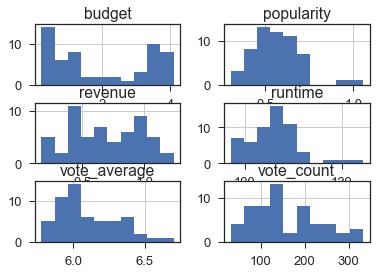

In [43]:
plot_data.hist();

#### Observations about Popularity Ratings:

   - As evident from histogram and quartile percentages, maximum ratings received fall in the 0.47 to 0.62 ranges.
   - The distribution is skewed to right.
   - It is observed that no values lie in the range 0.73 to 0.89. This needs further scrutiny.

#### Observations of Revenues:

From the plots and histogram, we can see that:

   - Distribution is left skewed.
   - Most movie revenues fall in the 2.400000e+07 to 3.982332e+07 ranges. 


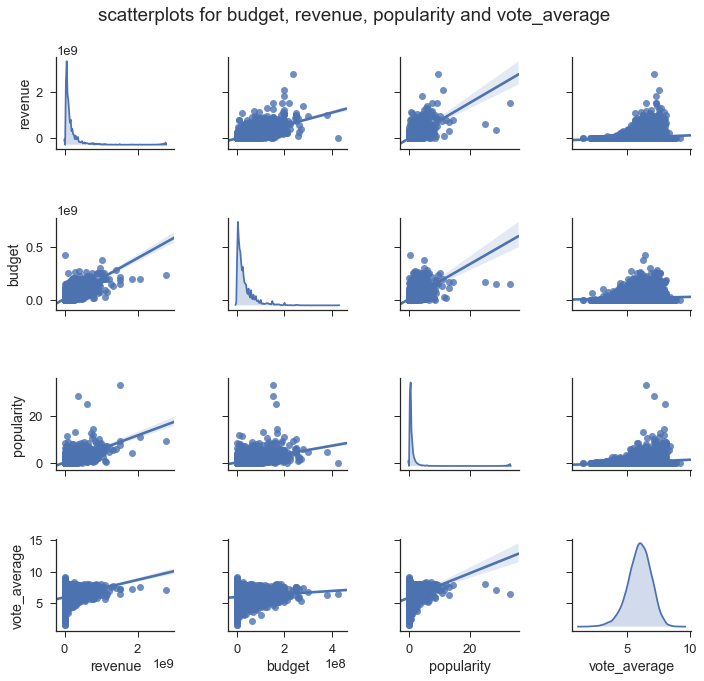

In [72]:
# Reference:https://seaborn.pydata.org/generated/seaborn.pairplot.html

sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.3, style="ticks")

df = tmdb_movies[['revenue', 'budget', 'popularity', 'vote_average']]

f1 = sns.pairplot(df, kind="reg", diag_kind="kde", diag_kws=dict(shade=True))
f1.fig.suptitle('scatterplots for budget, revenue, popularity and vote_average')
f1.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

As shown from the above figure most of the parameters are positively correlated.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text xticklabel objects>)

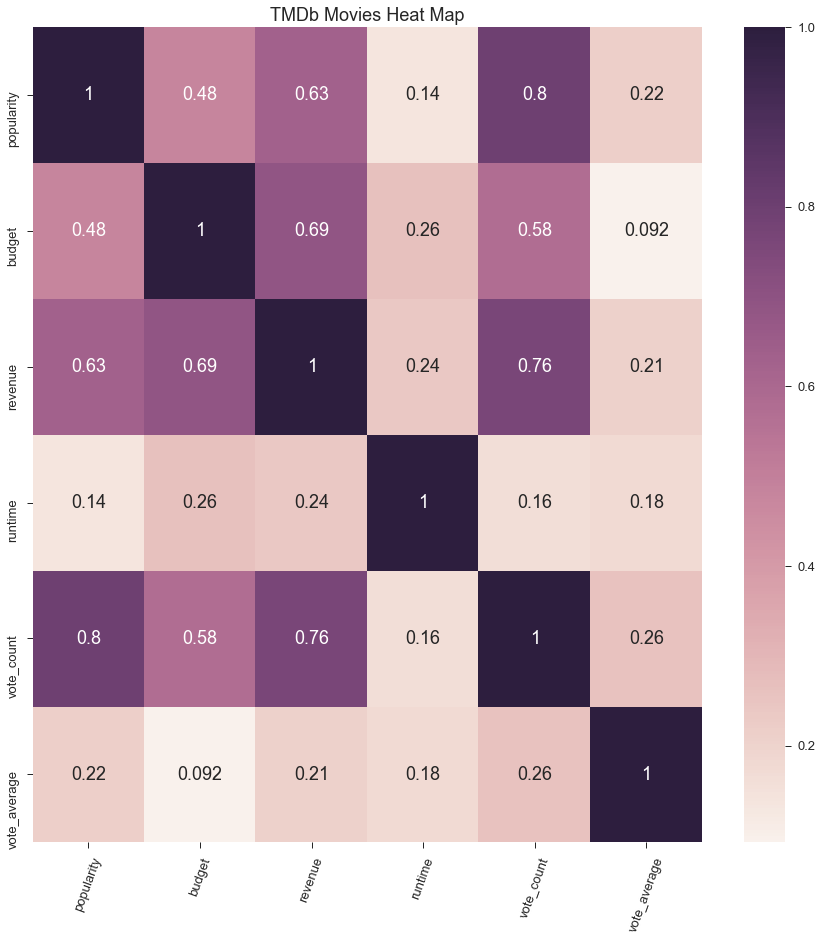

In [45]:
#Reference:https://python-graph-gallery.com/91-customize-seaborn-heatmap/
#Reference:https://stackoverflow.com/questions/40849562/change-the-height-of-a-seaborn-heatmap-colorbar
#Reference:https://seaborn.pydata.org/examples/heatmap_annotation.html
#Reference:https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
    
title= "TMDb Movies Heat Map"
plt.title(title,fontsize=18)
corr = tmdb_movies[['popularity','budget','revenue',
                    'runtime','vote_count','vote_average']].corr()
sns.heatmap(corr,cbar_kws={ 'shrink' : 1 },
            annot =True , annot_kws = { 'fontsize' : 18 },
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.xticks(rotation=70)

<p style='text-align: justify;'> 
As shown from the above figure there is a strong relatioship between popularity and vote count , also between vote count vs revenue and then budget.Also there is a good relationship between budget vs revenue.
</span>

In [46]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

### Research Question 1 (Which genres are most popular from year to year?)

#### - The most popular genres through the period (1960-2015) is Drama 

In [47]:
tmdb_movies['genres'].value_counts().idxmax()

'Drama'

#### - Function to count the total number of each type of movies 

In [48]:
# Reference:https://stackoverflow.com/questions/35523635/extract-values-in-pandas-value-counts
# Reference:https://www.geeksforgeeks.org/python-pandas-series-str-cat-to-concatenate-string/
def most_popular_genres(file_name):
    genres = file_name["genres"].str.cat(sep="|").split("|")
    count=pd.Series(genres).value_counts(ascending=False)
    print (count)    
most_popular_genres(tmdb_movies)

Drama              4738
Comedy             3765
Thriller           2900
Action             2374
Romance            1703
Horror             1628
Adventure          1464
Crime              1352
Science Fiction    1220
Family             1212
Fantasy             907
Mystery             806
Animation           664
Documentary         467
Music               394
History             330
War                 268
Foreign             183
Western             164
TV Movie            159
dtype: int64


In [49]:
tmdb_movies = tmdb_movies.groupby('release_year')['genres'].value_counts().reset_index(name = 'No.of Movies')
tmdb_movies.set_index('genres',inplace =True)

#### - The total number of each type of movies each year

In [50]:
tmdb_movies.head()

,release_year,No.of Movies
genres,,
Horror,1960,3
Comedy,1960,2
Comedy|Drama|Romance,1960,2
Comedy|Romance,1960,2
Drama,1960,2


#### - The best movie released for each year

In [51]:
tmdb_movies.groupby(['release_year'])['No.of Movies'].idxmax()

release_year
1960                            Horror
1961                             Drama
1962                             Drama
1963                            Horror
1964                    Comedy|Romance
1965    Action|Adventure|Drama|Western
1966                    Action|Western
1967              Comedy|Drama|Romance
1968                            Comedy
1969                             Drama
1970                            Horror
1971                             Drama
1972                            Comedy
1973                       Crime|Drama
1974            Comedy|Science Fiction
1975                            Comedy
1976                   Horror|Thriller
1977            Horror|Science Fiction
1978                            Horror
1979                            Comedy
1980                     Action|Comedy
1981                            Comedy
1982                            Comedy
1983                            Comedy
1984                            Comedy
1985        

#### - Present the percentage of movies in each genre between 1960 and 2015

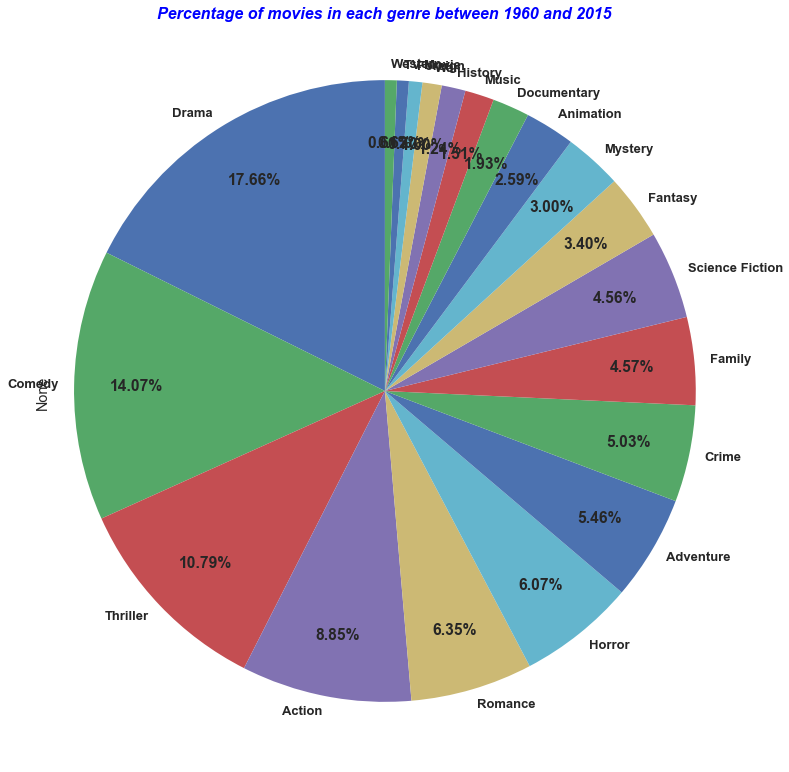

In [52]:
#Reference:https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie
tmdb_movies = pd.read_csv('tmdb-movies.csv')
genres= tmdb_movies["genres"].str.cat(sep="|").split("|")
count=pd.Series(genres).value_counts(ascending=False)

fig1, ax = plt.subplots()
count.plot(kind='pie',figsize = (10, 11), autopct = '%1.2f%%' ,
           startangle = 90,labeldistance=1.05,pctdistance=0.8, 
           textprops=dict(weight="bold"),shadow=False)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.title("Percentage of movies in each genre between 1960 and 2015",fontsize=16,style ='italic',weight='black',color='b')
plt.tight_layout()
plt.show()

As Shown in the above figure the highest percentage of the first five genre of the movie as the following:-
Drama, Comedy, Thriller, Action, or Romance.


#### - Present the number of movies according to movie genres

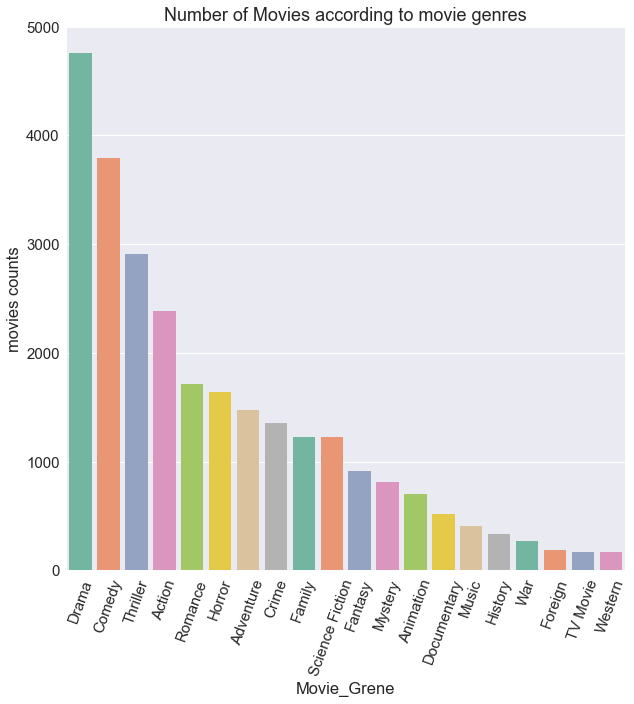

In [53]:
tmdb_movies = pd.read_csv('tmdb-movies.csv')
genres = tmdb_movies["genres"].str.cat(sep="|").split("|")
count=pd.Series(genres).value_counts(ascending=False)
Movie_Grene = count.sort_values(ascending= False)

sns.set(rc={'figure.figsize':(10,10)}, font_scale=1.5)
ax = sns.barplot(Movie_Grene.index, Movie_Grene,palette="Set2")

#ax.set_xticklabels(tmdb_movies['genres'], rotation=70) / another method to rotate the xticklabels

# Reference: https://stackoverflow.com/questions/32244019/how-to-rotate-x-axis-tick-labels-in-pandas-barplot
#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(70)
    
ax.set(xlabel='Movie_Grene', ylabel='movies counts', title = 'Number of Movies according to movie genres')
plt.show()

As shown in the above figure the highest number of movies of the five genre of the movie as the following:-
Drama, Comedy, Thriller, Action, or Romance.


### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

#### -  Plot the total profits earned by all movie's vs year of their release to have general overview about the revenue, when exactly increased and decreased

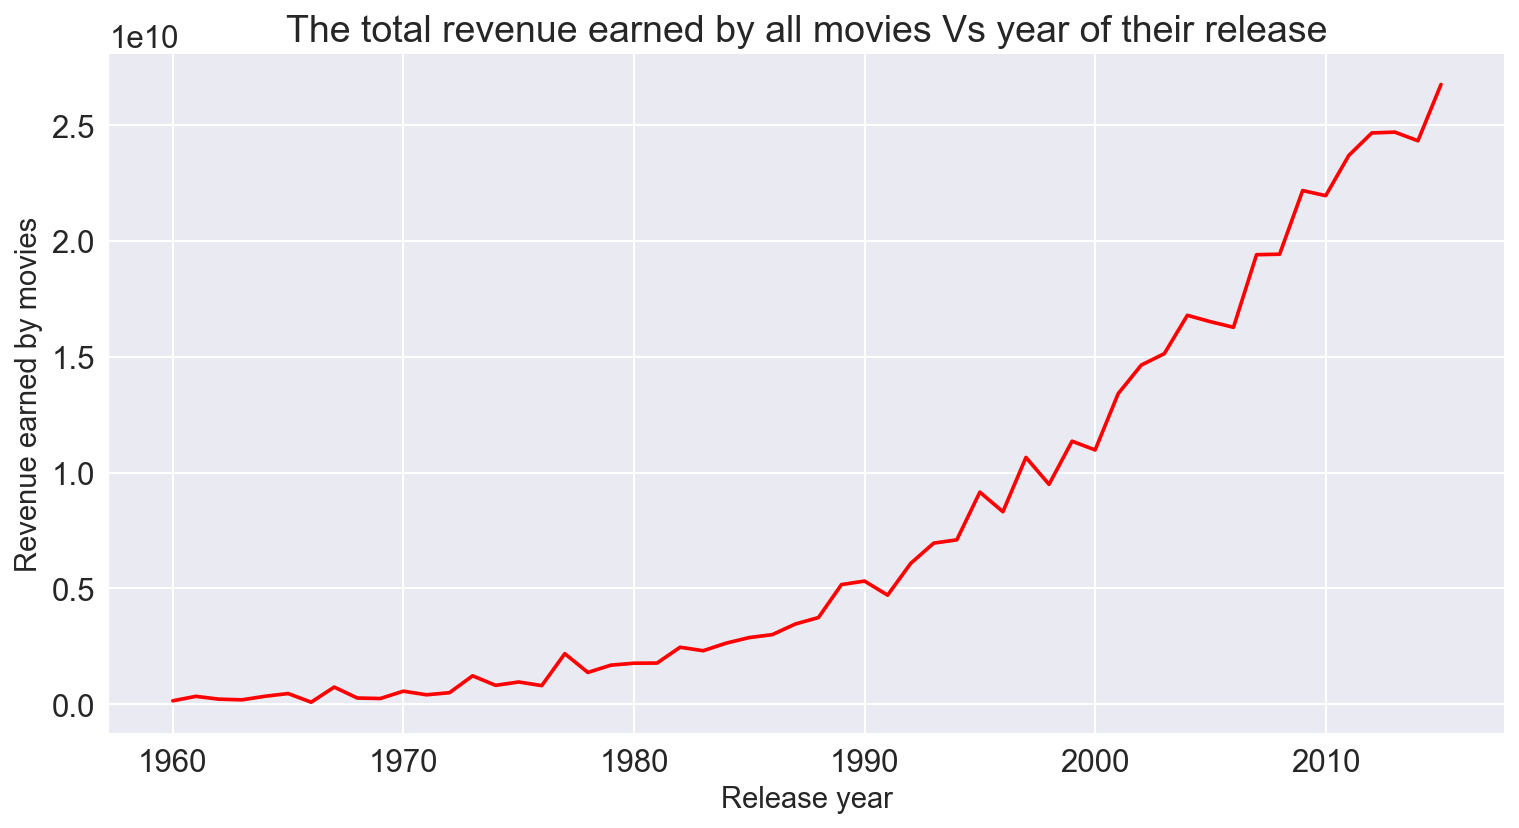

In [54]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year
sns.set_style('darkgrid')

revenue_year = tmdb_movies.groupby('release_year')['revenue'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 150)

#on x-axis
plt.xlabel('Release year', fontsize = 14)
#on y-axis
plt.ylabel('Revenue earned by movies', fontsize = 14)
#title of the line plot
plt.title('The total revenue earned by all movies Vs year of their release')

#plotting the graph
plt.plot(revenue_year, color = 'r')

#displaying the line plot
plt.show()

As shown from the above figure the revenue dramaticaly increase every year

#### I am going to check if high revenue depends on particular genres,director,production companies,budget,revenue .

### (1) Genres vs Revenue

#### Which genres that has higher revenue through the period (1960-2015)
The highest revenue of the genres coming from  (Comedy Movie) even the the highest number of watching movie is Drama.

In [55]:
tmdb_movies.groupby('genres').sum().sort_values(by = 'revenue',ascending = False)['revenue'].head()

genres
Comedy                      20323889661
Drama                       15107533347
Comedy|Romance              11545724341
Adventure|Fantasy|Action     7597483556
Comedy|Drama|Romance         7251175696
Name: revenue, dtype: int64

In [56]:
tmdb_movies['genres'].value_counts().idxmax()

'Comedy'

### (2) Director vs Revenue

Steven Spielberg is the highest director achieve revenue but in ranking he is the third person, while Woody Allen come first for number of movie that he works with.  

In [57]:
tmdb_movies.groupby('director').sum().sort_values(by = 'revenue',ascending = False)['revenue'][0:10]

director
Steven Spielberg     9018563772
Peter Jackson        6523244659
James Cameron        5841894863
Michael Bay          4917208171
Christopher Nolan    4167548502
David Yates          4154295625
Robert Zemeckis      3869690869
Chris Columbus       3851491668
Tim Burton           3665414624
Ridley Scott         3649996480
Name: revenue, dtype: int64

In [58]:
tmdb_movies['director'].value_counts().idxmax()

'Woody Allen'

### (3) Production Companies vs Revenue

Paramount Pictures is the highest company acheieved revenue and activity.

In [59]:
tmdb_movies.groupby('production_companies').sum().sort_values(by = 'revenue',ascending = False)['revenue'].head()

production_companies
Paramount Pictures                              8097344275
Walt Disney Pictures|Pixar Animation Studios    7648558520
DreamWorks Animation                            6676741096
Marvel Studios                                  6047908966
Columbia Pictures                               4925479137
Name: revenue, dtype: int64

In [60]:
tmdb_movies['production_companies'].value_counts().idxmax()

'Paramount Pictures'

### (4) Budget

In [61]:
# Retrieving the average budget
profit_avg_budget = tmdb_movies['budget'].mean()
print('The average budget of a successful movie is ${0:.2f}'.format(profit_avg_budget))

The average budget of a successful movie is $14625701.09


### (5) Revenue (can be expected)

In [62]:
# Retrieving the average budget
profit_avg_revenue = tmdb_movies['revenue'].mean()
print('The average revenue of a succesful movie is ${0:.2f}'.format(profit_avg_revenue))

The average revenue of a succesful movie is $39823319.79


### Research Question 3  ( In which year most of the movies released?)
In 2014 released 700 movie in this year which is the highest number of movies through the period (1960-2015)

In [63]:
tmdb_movies['release_year'].value_counts().head(5)

2014    700
2013    659
2015    629
2012    588
2011    540
Name: release_year, dtype: int64

In [64]:
movie_count = tmdb_movies.groupby('release_year').count()['id']
movie_count.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

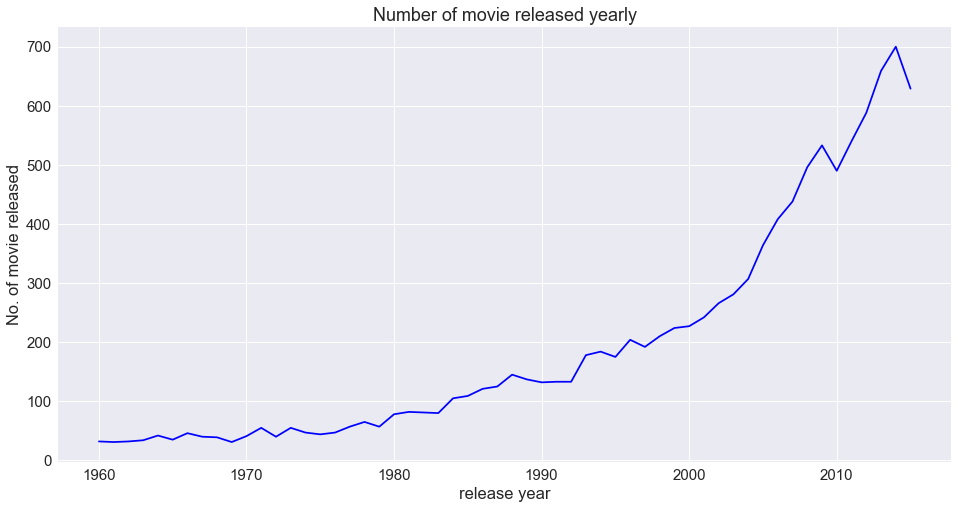

In [65]:
#set style
sns.set_style('darkgrid')
#set x, y axis data
# x is movie release year
x = movie_count.index
# y is number of movie released
y = movie_count
#set size
plt.figure(figsize=(16, 8))
#plot line chart 
plt.plot(x, y, color = 'b', label = 'mean')
#set title and labels
plt.title('Number of movie released yearly')
plt.xlabel('release year')
plt.ylabel('No. of movie released');

As shown from the above figure the number of movies released dramaticaly increase every year.

### Research Question 4 ( What is the average runtime of the movies?)

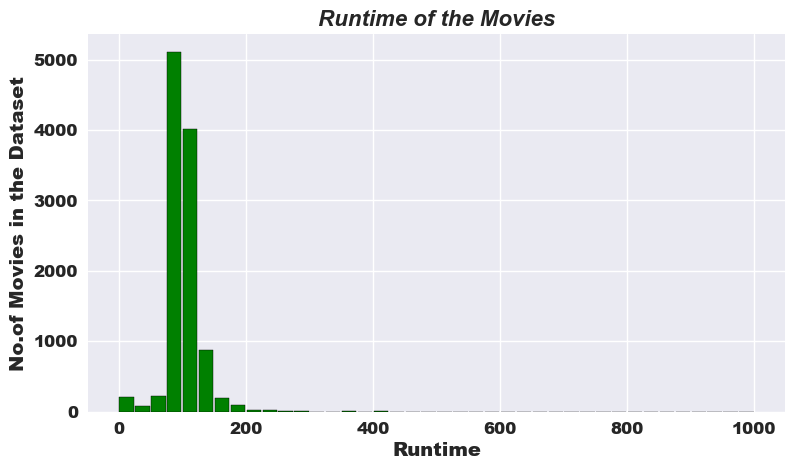

In [66]:
plt.figure(figsize=(9,5), dpi = 100)
plt.hist(tmdb_movies['runtime'] , rwidth = 0.9, align=('mid'),range = (0, 1000), bins = 40, color ='green' ,label = ['Runtime'],alpha=1,histtype='bar', ec='black')
plt.title('Runtime of the Movies',fontsize=16,style ='italic',weight='black')
plt.xlabel('Runtime',fontsize=14,weight='black')
plt.ylabel("No.of Movies in the Dataset",fontsize=14,weight='black')
plt.xticks(fontsize = 12,weight='black') 
plt.yticks(fontsize = 12,weight='black')
plt.show()

#### Observations about Runtimes:

   -  As seen in the plots and functions above, popular runtimes over the years are between 100 and 107 minutes.
   - The distribution is right skewed.

 


#### - The Average runtime of the movies

In [67]:
tmdb_movies['runtime']=tmdb_movies['runtime'].mean()
print(round(tmdb_movies['runtime'].mean(),0))

102.0


Average runtime of a movie was around 102 minutes or 1 hour 42 minutes

### Research Question 5 ( What is the  popularity over years?)

To explore this question, let's take a look of the dataset.

In [68]:
tmdb_movies[['release_year','popularity']].head()

,release_year,popularity
0,2015,32.985763
1,2015,28.419936
2,2015,13.112507
3,2015,11.173104
4,2015,9.335014


In [69]:
# compute the mean for popularity
popularity_mean = tmdb_movies.groupby('release_year').mean()['popularity']
popularity_mean.head()

release_year
1960    0.458932
1961    0.422827
1962    0.454783
1963    0.502706
1964    0.412428
Name: popularity, dtype: float64

In [70]:
# build the index location for x-axis
index_mean = popularity_mean.index

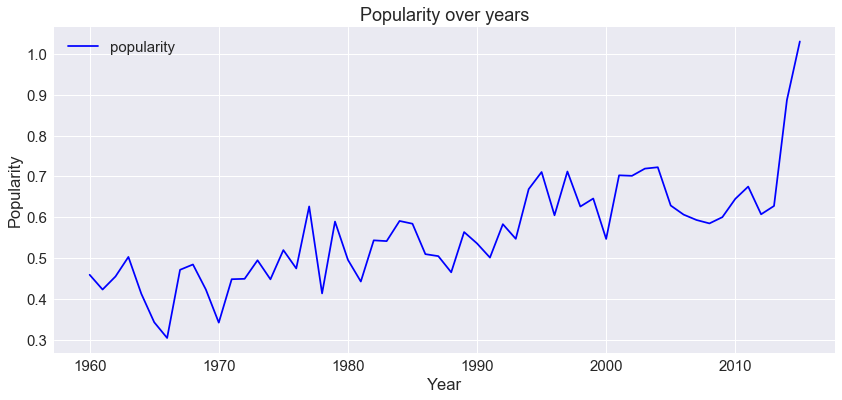

In [71]:
#set style
sns.set_style('darkgrid')
#set x, y axis data
#x1, y1 for mean data; x2, y2 for median data
x1, y1 = index_mean, popularity_mean
#set size
plt.figure(figsize=(14, 6))
#plot line chart for mean and median
plt.plot(x1, y1, color = 'b')
#set title and labels
plt.title('Popularity over years')
plt.xlabel('Year')
plt.ylabel('Popularity');
#set legend
plt.legend(loc='best')

As shown from the figure , we can see that the trend of the popularity mean increase yearly and the peak is in the 2015 all over the years , this increase may be easy to access to these movies from everywhere such as mobile , computer due to the availability of the internet everywhere and easy to search and see the prefered movie.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

<span style="color:red">This was a very interesting data analysis. We came out with some very interesting facts about movies</span>

<span style="color:red">From the above analysis, the following can be concluded as :- </span>

<span style="color:blue">Limitations:- </span>

<p style='text-align: justify;'> 
1- Data quality: althought I assume the zero values in revenue and budget column are missing, there are still a lot of unreasonable small/big value in the both of the columns. Also, the metrics about rating or popularity are not defined clearly,it actually have the high probability of having outliers.</p>
<p style='text-align: justify;'> 
2- The budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in.</p>
<p style='text-align: justify;'> 

<p style='text-align: justify;'> 
3- The inflation effect: I used the revenue and budget data to explore, but I didn't use the adjusted data, although it is provided the adjusted data based on the year 2010.</p>
<p style='text-align: justify;'> 
4- Dropping the rows with missing values (NaN) , hence a lot of key data might have been lost in the process,also affected the overall analysis.
</p>







<span style="color:blue">Observation:- </span>
-	Trend of releasing movies has increased over the years.

-	Total revenue earned by all movies increase every year.

-	The highest revenue of the genres coming from (Comedy Movie) even the highest number of watching movie is Drama.

-	Steven Spielberg is the highest director achieve revenue but in ranking he is the third person, while Woody Allen come first for number of movies that he works with.

-	Paramount Pictures is the highest company achieved revenue and activity.

-	Maximum number of movies (700 movie) release in year 2014.

-	Popularity over years increase and in 2015 the popularity increased to maximum due to the internet and electronics devices which makes watching movie so easy at any time.

<span style="color:blue">The criteria’s that need to be met to create a successful movie from the analysis:- </span>

   -	Average duration of the movie must be 102 minutes.
   -	Average Budget must be around 14.6 millon dollar.
   -	Average Revenue must be around 40 millon dollar.

#### •	The genre of the movie should be one of these:
-	Drama, 
-	Comedy, 
-	Thriller, 
-	Action, or 
-	Romance.

#### •	Director must be one or more of these:
-	Steven Spielberg, 
-	Peter Jackson, 
-	James Cameron, 
-	Michael Bay, or 
-	Christopher Nolan.

#### •	Production company must be one or more of these:
-	Paramount Pictures, 
-	Walt Disney Pictures or Pixar Animation Studios,    
-	DreamWorks Animation,
-	Marvel Studios, or
-	Columbia Pictures.

##### 	Finally the dataset given to me was of 10866 rows in total but it contained lot of missing values & some movies runtime values, budget, revenue was zero so I had to delete such rows after doing all the cleaning the data left was of 10704 rows .

